In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Q1)

In [2]:
data = pd.read_csv('linear.txt',sep=' ')

In [3]:
data.to_numpy()[:,0]

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [4]:
X = data.to_numpy()[:,0].reshape(-1,1)
Y = data.to_numpy()[:,1].reshape(-1,1)

In [18]:
class linear_regressor:
  w = np.random.randn()
  b = np.random.randn()
  hist = []
  def __init__(self,lr):
    self.alpha = lr
  def fit(self,X,Y,T):
    for t in range(T):
      y_pred = self.w*X + self.b
      loss = np.sum((Y-y_pred)**2)
      self.hist.append(loss)
      dw = np.sum(2*X*(y_pred-Y))
      db = np.sum(2*(y_pred-Y))
      self.w = self.w - self.alpha*dw
      self.b = self.b - self.alpha*db

In [19]:
model = linear_regressor(0.001)
model.fit(X,Y,1000)

In [20]:
model.hist[len(model.hist)-1]/len(X)

0.09296321784071308

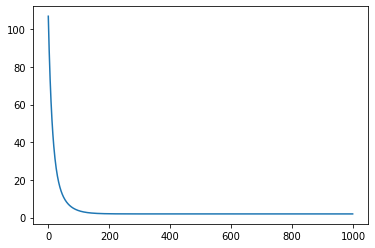

In [21]:
plt.plot([i for i in range(len(model.hist))],model.hist)

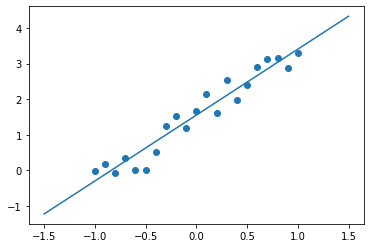

In [22]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
xx = np.linspace(-1.5,1.5,100)
yy = [model.w*x+model.b for x in xx]
plt.plot(xx,yy)

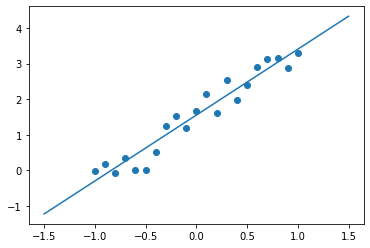

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data.to_numpy()[:,0].reshape(-1,1),data.to_numpy()[:,1])
plt.scatter(data.iloc[:,0],data.iloc[:,1])
xx = np.linspace(-1.5,1.5,100)
yy = [model.coef_*x+model.intercept_ for x in xx]
plt.plot(xx,yy)

###Q2)

In [27]:
data = pd.read_csv('logistic.txt',sep=' ')

In [28]:
data

,x(1),x(2),y
0,1.177900,1.834400,1
1,1.989100,1.800800,1
2,1.398500,1.275500,1
3,1.988600,1.540800,1
4,1.155400,1.602100,1
5,1.008300,1.951500,1
6,1.743900,1.918200,1
7,1.444800,1.991300,1
8,1.297300,1.169400,1
9,1.521500,1.148200,1


In [29]:
X = data.drop(['y'],axis=1).to_numpy().reshape(-1,2)
Y = data.to_numpy()[:,2].reshape(-1,1)

In [30]:
class logistic_regressor:
  hist = []
  acc = 0
  def __init__(self,lr,dim):
    self.alpha = lr
    self.w = np.random.rand(dim,1)
    self.hist = []
    self.acc = 0
  def sigmoid(self,x):
    return(1/(1+np.exp(-x)))
  def fit(self,X,Y,T):
    X = np.append(X,np.ones((X.shape[0],1)),axis=1)
    for t in range(T):
      z_pred = np.dot(X,self.w)
      y_pred = 1/(1+np.exp(-z_pred))
      loss = np.sum(-np.log(self.sigmoid(z_pred*Y)),axis=0)
      self.hist.append(loss)
      tmp = -Y*(self.sigmoid(-Y*z_pred))
      dw = np.sum(X*tmp,axis=0).reshape(-1,1)
      #print(self.w)
      self.w = self.w - self.alpha*dw
  def pred(self,X):
    X = np.append(X,np.ones((X.shape[0],1)),axis=1)
    z_pred = np.dot(X,self.w)
    y_pred = 1/(1+np.exp(-z_pred))
    for i in range(len(y_pred)):
      if(y_pred[i,0]>0.5):
        y_pred[i,0] = 1
      else:
        y_pred[i,0] = -1
    return y_pred
  def eval(self,X,Y):
    Y_pred = self.pred(X)
    X = np.append(X,np.ones((X.shape[0],1)),axis=1)
    cnt = 0
    for i in range(len(Y)):
      if(Y[i,0]==Y_pred[i,0]):
        cnt+=1
    self.acc = cnt/len(Y)
    return(self.acc)

In [31]:
model = logistic_regressor(0.01,3)

In [32]:
model.fit(X,Y,100)

In [33]:
model.eval(X,Y)

1.0

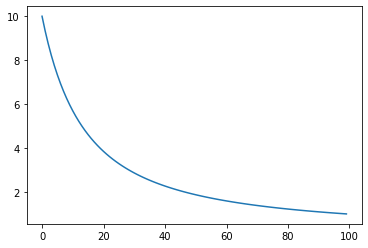

In [34]:
plt.plot([i for i in range(len(model.hist))],model.hist)

In [43]:
model.w

array([[ 1.72681208],
       [ 1.74352257],
       [-0.97464351]])

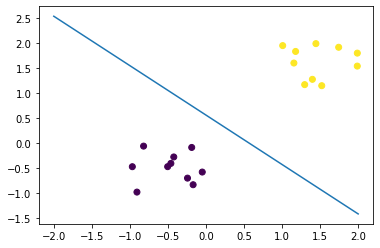

In [51]:
plt.scatter(X[:,0],X[:,1],c=Y)
xx = np.linspace(-2,2,100)
yy = [-(model.w[0]/model.w[1])*x-(model.w[2]/model.w[1]) for x in xx]
plt.plot(xx,yy)

###Q3)

In [ ]:
#!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

In [ ]:
!rm -r /root/.kaggle

In [ ]:
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d oddrationale/mnist-in-csv

 59% 9.00M/15.2M [00:00<00:00, 89.4MB/s]
100% 15.2M/15.2M [00:00<00:00, 97.0MB/s]


In [ ]:
!unzip ./mnist-in-csv.zip

Archive:  ./mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
data = pd.read_csv('mnist_train.csv')
cols = data.columns.to_list()
dat = pd.DataFrame()

In [ ]:
for i in range(len(data)):
  if(data.iloc[i,0]==4 or data.iloc[i,0]==7):
    row = data.iloc[i].to_dict()
    if(row['label']==7):
      row['label'] = 1
    else:
      row['label'] = -1
    dat = dat.append(row,ignore_index=True)

####labelling 4 as -1 and 7 as +1

In [ ]:
dat = dat[cols]
X = dat.drop(['label'],axis=1).to_numpy()/255.0
Y = dat['label'].to_numpy().reshape(-1,1)
X.shape

(12107, 784)

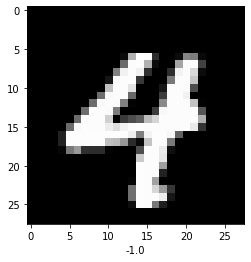

In [ ]:
i = np.random.randint(0,X.shape[0])
plt.imshow(X[i].reshape(28,28),cmap='gray')
plt.xlabel(Y[i,0])
plt.show()

In [ ]:
model = logistic_regressor(0.001,X.shape[1]+1)

In [ ]:
model.fit(X,Y,1000)

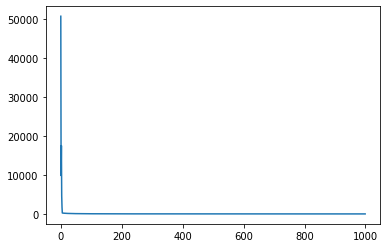

In [ ]:
plt.plot([i for i in range(len(model.hist))],model.hist)

In [ ]:
model.eval(X,Y)

1.0

####Testing trained model on Test Data 

In [ ]:
data = pd.read_csv('mnist_test.csv')
cols = data.columns.to_list()
dat = pd.DataFrame()

In [ ]:
for i in range(len(data)):
  if(data.iloc[i,0]==4 or data.iloc[i,0]==7):
    row = data.iloc[i].to_dict()
    if(row['label']==7):
      row['label'] = 1
    else:
      row['label'] = -1
    dat = dat.append(row,ignore_index=True)

In [ ]:
dat = dat[cols]
X = dat.drop(['label'],axis=1).to_numpy()/255.0
Y = dat['label'].to_numpy().reshape(-1,1)
X.shape

(2010, 784)

In [ ]:
model.eval(X,Y)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,model.pred(X))

array([[ 982,    0],
       [   0, 1028]])